
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2023**

---

# Varias Variables

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2022_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,numero,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,...,profile_studies_level_state,profile_career,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),300000.0,245000.0,True,NaN,NaN,NaN,...,Completo,Licenciatura en redes y comunicación de datos,UP - Universidad de Palermo,NaN,NaN,NaN,NaN,NaN,35,Varón Cis
1,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),900000.0,850000.0,True,Cobro todo el salario en dólares,300,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,Varón Cis
2,Argentina,Chaco,Full-Time,Staff (planta permanente),120000.0,115000.0,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,Varón Cis


# Variables Categóricas


In [ ]:
df.profile_gender.unique()

array(['Varón Cis', 'Varón cis', 'Mujer Cis', 'Mujer', 'Varón Trans',
       'Queer', 'No binarie', 'Mujer cis', 'Mujer Trans', 'mujer', 'Gay',
       'Fluido', 'Bigénero', 'Femenino'], dtype=object)

In [ ]:
df.loc[:,'profile_g'] = df.profile_gender.replace({'Varón Cis': 'Varón cis','Mujer': 'Mujer cis','Mujer Cis': 'Mujer cis','Femenino': 'Mujer cis','mujer': 'Mujer cis','Mujer':'Mujer cis','Queer':'Diversidades','Varón Trans':'Diversidades','No binarie':'Diversidades','Mujer Trans':'Diversidades','Fluido':'Diversidades','Bigénero':'Diversidades','Gay':'Diversidades'}).fillna(False)

In [ ]:
df.profile_g.unique()

array(['Varón cis', 'Mujer cis', 'Diversidades'], dtype=object)

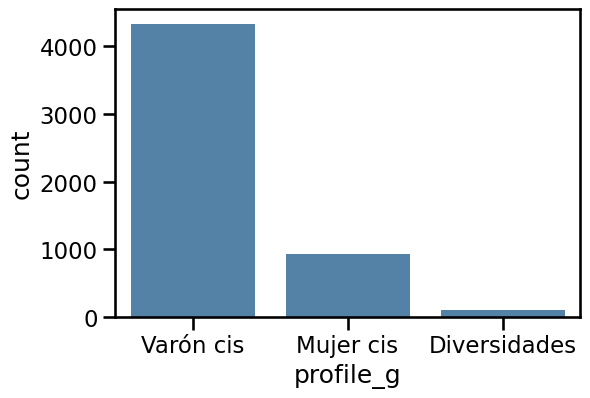

0       Varón Cis
1       Varón Cis
2       Varón Cis
3       Varón Cis
4       Varón Cis
          ...    
5353    Mujer Cis
5354    Mujer Cis
5355        Mujer
5356    Varón cis
5357     Bigénero
Name: profile_gender, Length: 5358, dtype: object
<class 'pandas.core.series.Series'>


In [ ]:
fig = plt.figure(figsize=(6,4)) #se genera la figura y se define su tamaño
seaborn.countplot(x=df.profile_g, color='steelblue') # gráfico de conteos de la primer columna (profile_gender)
plt.show()
print(df.profile_gender) #columna
print(type(df.profile_gender)) #tipo de datos, es útil imprimir y entender el tipo de datos, dimensiones, etc.

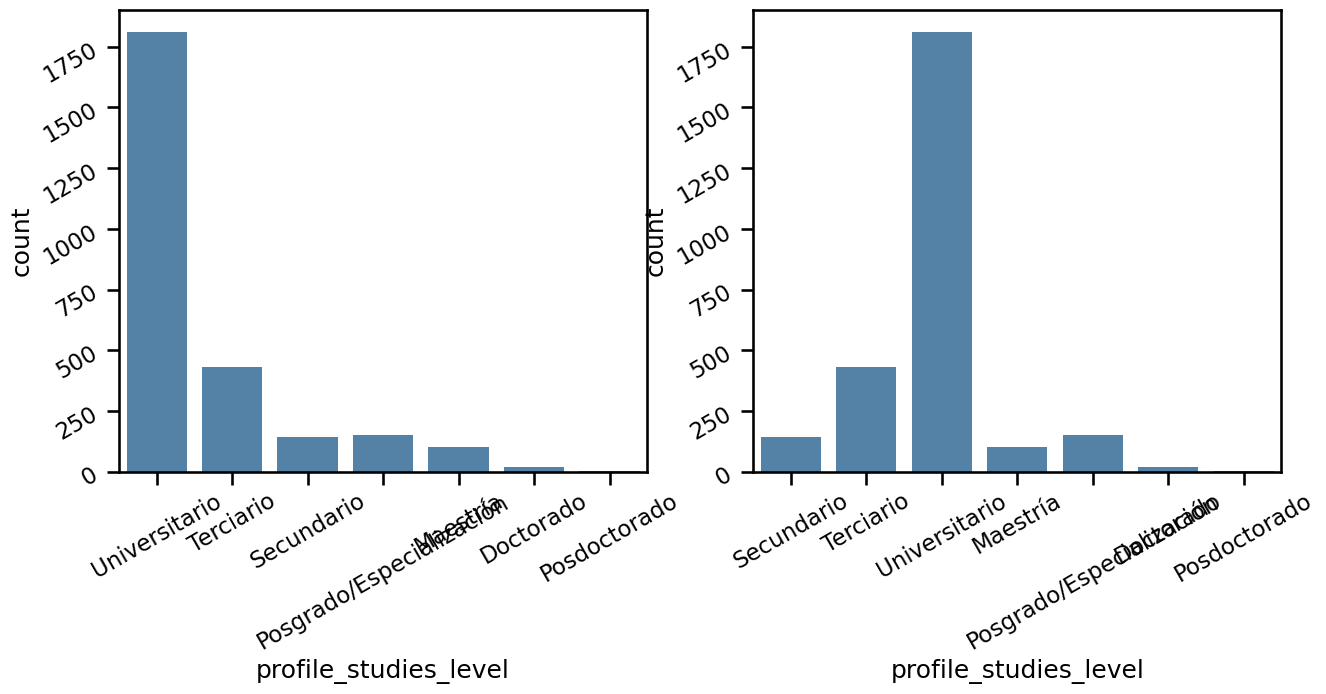

In [ ]:
sorted_studies_levels = ['Secundario', 'Terciario', 'Universitario',
                         'Maestría','Posgrado/Especialización', 'Doctorado', 'Posdoctorado']#lista de los nombres de categorías ordenadas
fig, axes = plt.subplots(ncols=2, figsize=(15,6)) #se genera la figura, se divide en dos lugares y se define su tamaño
g = seaborn.countplot(x= df.profile_studies_level.dropna(), color='steelblue', ax=axes[0]) #gráfico de conteos (en el lugar 0)
g = seaborn.countplot(x= df.profile_studies_level.dropna(), color='steelblue', ax=axes[1], #gráfico de conteos ordenado (en el lugar 1)
                  order=sorted_studies_levels)
for ax in axes:
  ax.tick_params(labelrotation=30) # en cada lugar (ax in axes) se rota la etiqueta

# Variables Numéricas


In [ ]:
salary_col='salary_monthly_BRUTO' #defino variable con el nombre de la columna de interés
#salary_col='salary_monthly_NETO'

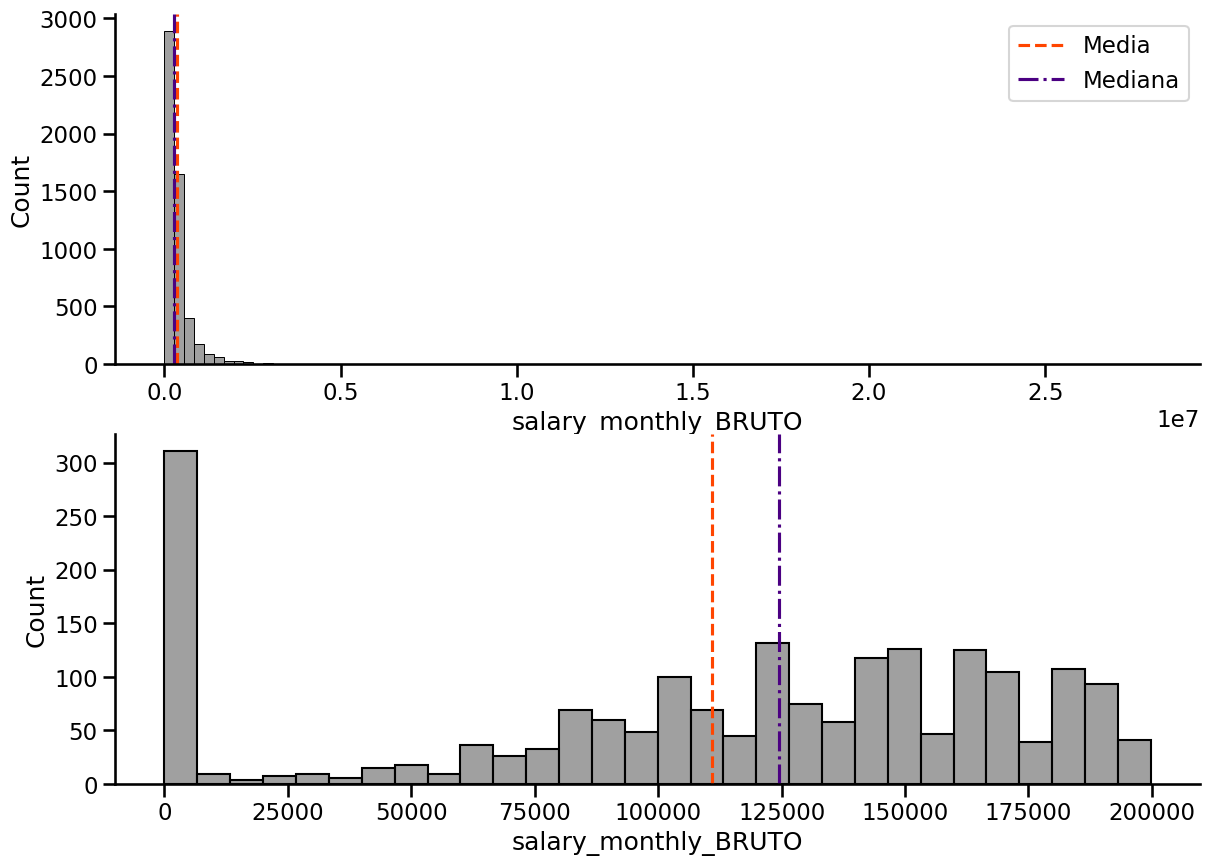

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(14, 10)) #se genera la figura, se divide en dos lugares y se define su tamaño

seaborn.histplot(df[salary_col], bins=100, ax=axes[0], color='gray') #Histograma con 100 bins
axes[0].axvline(df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

filtered_df = df[df[salary_col] < 200000] 
seaborn.histplot(filtered_df[salary_col], bins=30, ax=axes[1], color='gray')
axes[1].axvline(filtered_df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(filtered_df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[0].legend()
seaborn.despine()

In [ ]:
print(df[salary_col][:4])
print(type(df[salary_col]))

0    300000.0
1    900000.0
2    120000.0
3    440000.0
Name: salary_monthly_BRUTO, dtype: float64
<class 'pandas.core.series.Series'>


#Varias Variables



## Varias Categóricas

In [ ]:
## Tabla de contingencia
pd.crosstab(df.profile_g, df.profile_studies_level)#, normalize=True) #no están ordenados 
pd.crosstab(df.profile_g, df.profile_studies_level)[sorted_studies_levels]#ordenados 

profile_studies_level,Secundario,Terciario,Universitario,Maestría,Posgrado/Especialización,Doctorado,Posdoctorado
profile_g,,,,,,,
Diversidades,7,8,29,1,4,0,0
Mujer cis,10,90,354,13,55,5,1
Varón cis,125,332,1428,87,91,16,3


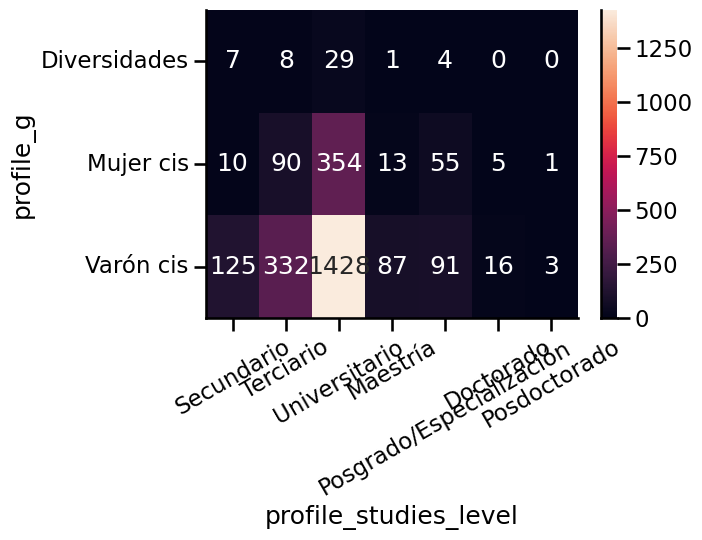

In [ ]:
fig = plt.figure(figsize=(6,4))
exp = pd.crosstab(df.profile_g,
                  df.profile_studies_level)[sorted_studies_levels]
seaborn.heatmap(exp, annot=True, fmt='g')
plt.xticks(rotation=30)
plt.yticks(rotation=0)
seaborn.despine()

In [ ]:
## Tabla de contingencia normalizada, la suma de los valores da 1, son proporciones, estima probabilidad
pd.crosstab(df.profile_g, df.profile_studies_level, normalize=True)[sorted_studies_levels]

profile_studies_level,Secundario,Terciario,Universitario,Maestría,Posgrado/Especialización,Doctorado,Posdoctorado
profile_g,,,,,,,
Diversidades,0.002633,0.003009,0.010906,0.000376,0.001504,0.000000,0.000000
Mujer cis,0.003761,0.033847,0.133133,0.004889,0.020684,0.001880,0.000376
Varón cis,0.047010,0.124859,0.537044,0.032719,0.034223,0.006017,0.001128


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Secundario'),
  Text(1, 0, 'Terciario'),
  Text(2, 0, 'Universitario'),
  Text(3, 0, 'Maestría'),
  Text(4, 0, 'Posgrado/Especialización'),
  Text(5, 0, 'Doctorado'),
  Text(6, 0, 'Posdoctorado')])

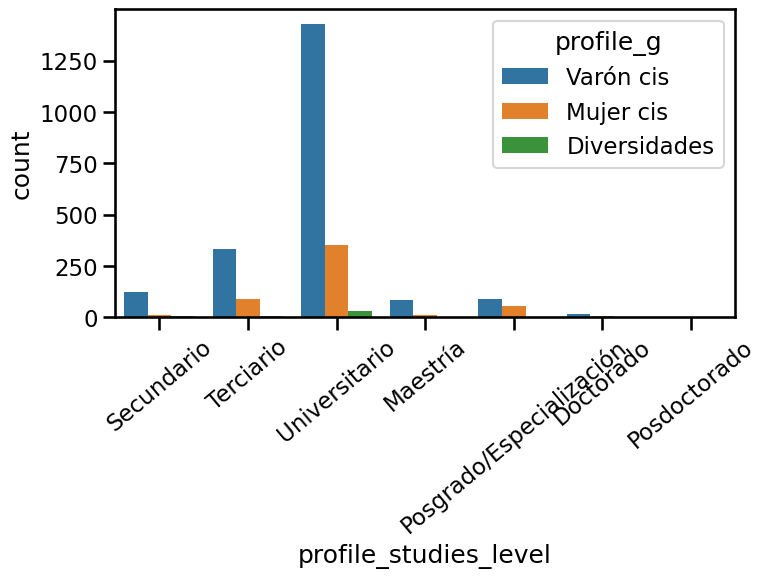

In [ ]:
fig = plt.figure(figsize=(8,4))
seaborn.countplot(x= df.profile_studies_level,  hue=df.profile_g, order=sorted_studies_levels )
plt.xticks(rotation=40)

## Varias numéricas

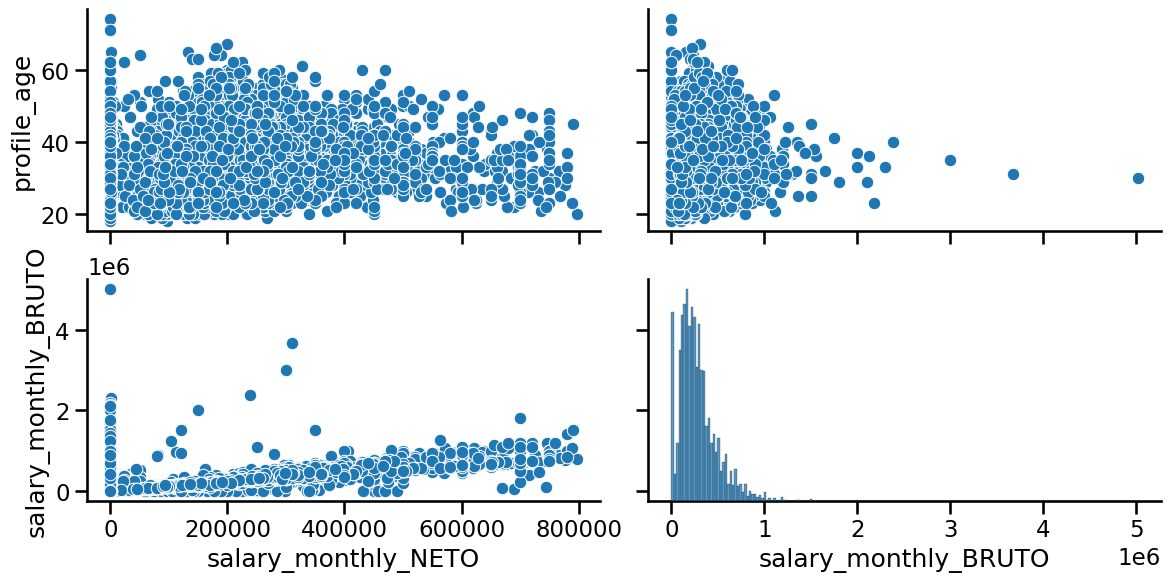

In [ ]:
max_sal = 800000
seaborn.pairplot(data=df[df.salary_monthly_NETO < max_sal],
                 y_vars=['profile_age', 'salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO', 'salary_monthly_BRUTO'],
                 aspect=2, height=3)

<Figure size 800x400 with 0 Axes>

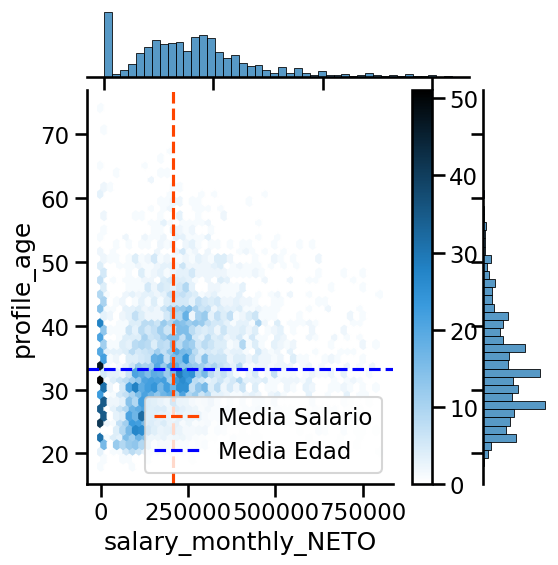

In [ ]:
fig = plt.figure(figsize=(8,4))
seaborn.jointplot(data=df[df.salary_monthly_NETO < max_sal], x='salary_monthly_NETO',
                  y='profile_age', kind='hex', height=6) 
plt.axvline(df[df.salary_monthly_NETO < max_sal]['salary_monthly_NETO'].mean(), color='orangered',
            linestyle='--', label='Media Salario')
plt.axhline(df[df.salary_monthly_NETO < max_sal]['profile_age'].mean(), color='blue',
            linestyle='--', label='Media Edad')
plt.legend()
plt.colorbar()
# Remove scietific notation
plt.ticklabel_format(style='plain', axis='y')

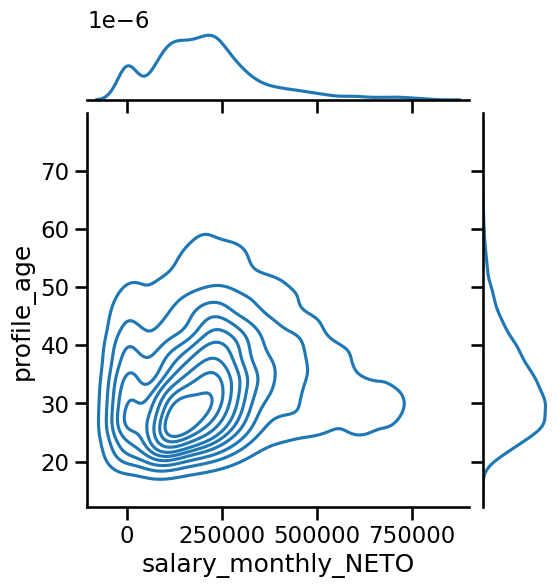

In [ ]:
seaborn.jointplot(data=df[df.salary_monthly_NETO < max_sal], x='salary_monthly_NETO',
                  y='profile_age', kind='kde', height=6)

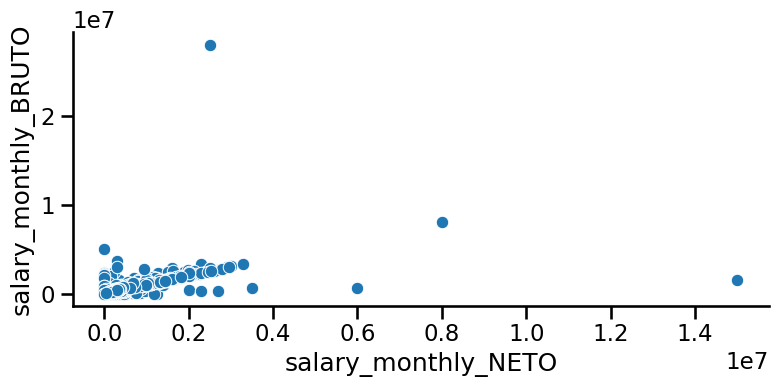

In [ ]:
seaborn.pairplot(data=df, y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=2, height=4)

**Pregunta** ¿Cuáles le parece que son las ventajas de ver de a dos  (o más) variables simultáneamente?

## Mixtas

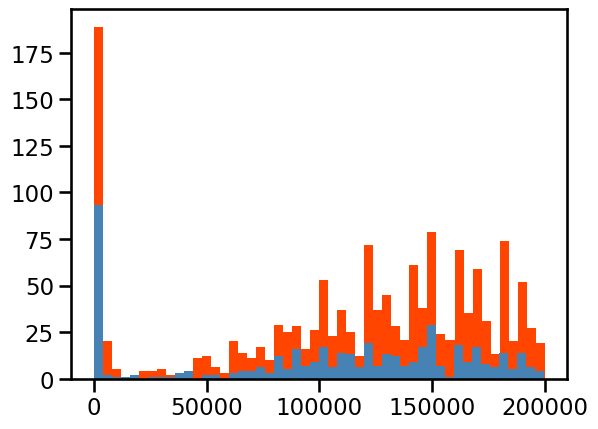

In [ ]:
filtered_df= df[df[salary_col] < 200000]
df_H= filtered_df[ filtered_df['profile_g']=='Varón cis']
df_M=filtered_df[ filtered_df['profile_g']=='Mujer cis']

plt.hist(df_H[salary_col], color='orangered', bins=50)
plt.hist(df_M[salary_col], color='steelblue', bins=50) #aca importa el orden, cuidado con la superposición
plt.show()


In [ ]:
seaborn.pairplot(data=df[df.profile_age < max_age], y_vars=['salary_monthly_NETO'],
                 x_vars=['salary_satisfaction'],
                 aspect=2, height=4)

Una desventaja de usar un pairplot para variables categóricas es la superposición de los puntos que tienen el mismo valor. Un gráfico que soluciona este problema es el `catplot`

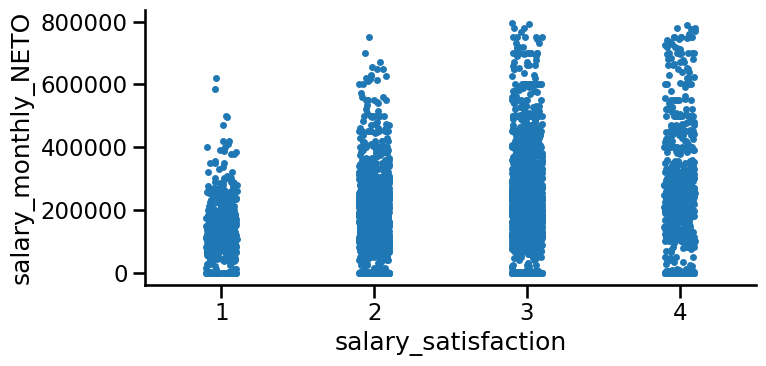

In [ ]:
seaborn.catplot(data=df[df.salary_monthly_NETO < max_sal], y='salary_monthly_NETO',  #probar también con profile_age, 'profile_gender'
                x='salary_satisfaction', height=4, aspect=2)

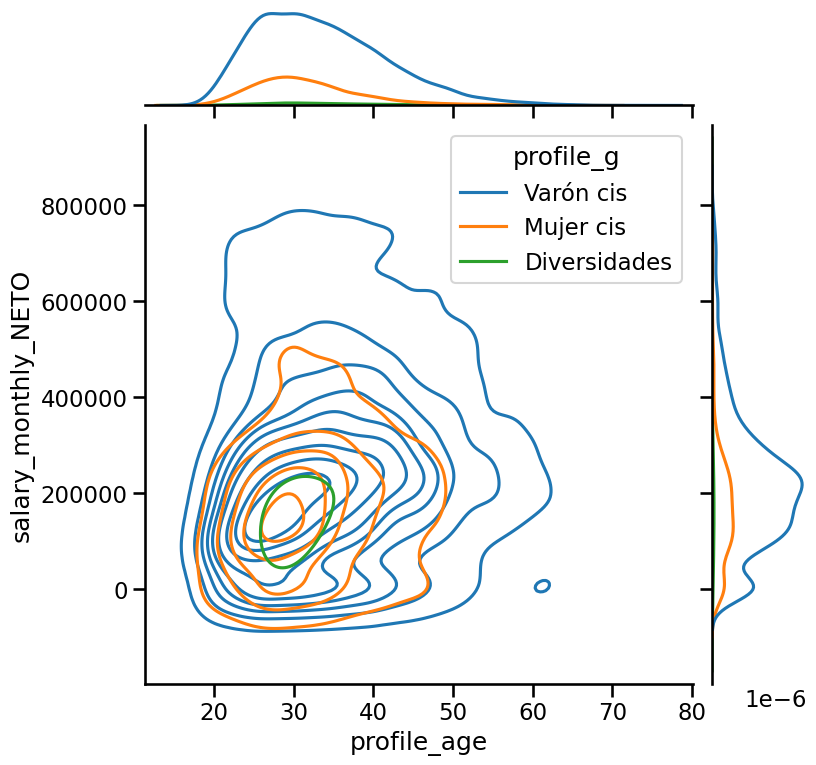

In [ ]:
seaborn.jointplot(data=df[df.salary_monthly_NETO < max_sal], x='profile_age',
                  y='salary_monthly_NETO', hue='profile_g',
                  kind='kde', height=8)

Distribucion (con boxplot) condicional

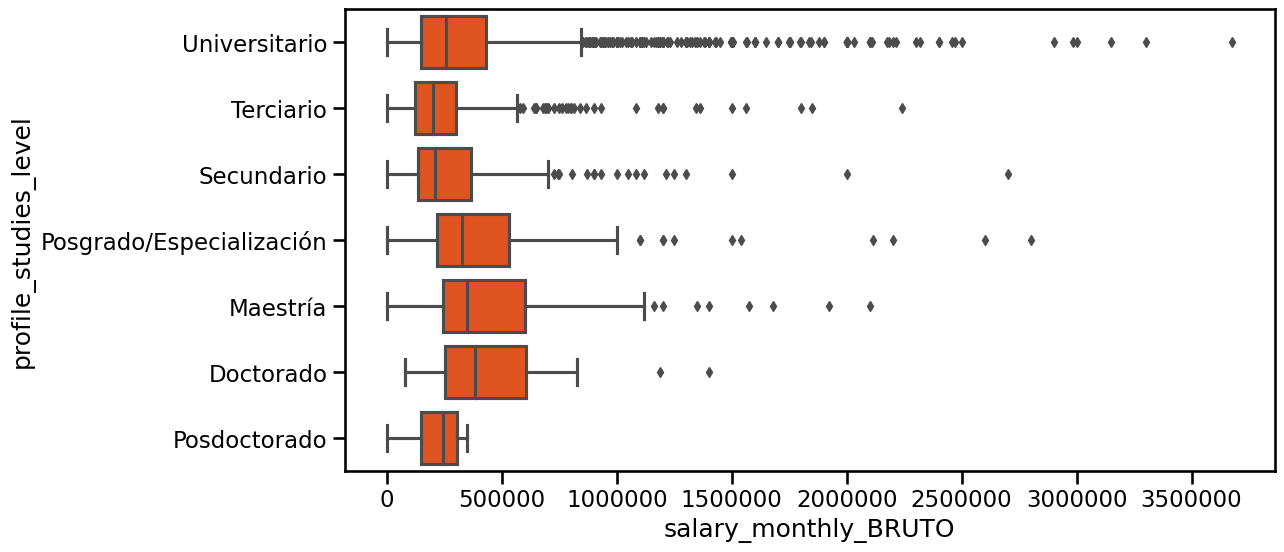

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df, x=salary_col, y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

# Práctico para resolver en clase

1. Analice las variables `'salary_monthly_BRUTO'` (salario mensual Bruto) y `'salary_monthly_NETO'` (salario Neto) en conjunto, que comentarios puede hacer al respecto?


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000.]),
 [Text(-200000.0, 0, '−200000'),
  Text(0.0, 0, '0'),
  Text(200000.0, 0, '200000'),
  Text(400000.0, 0, '400000'),
  Text(600000.0, 0, '600000'),
  Text(800000.0, 0, '800000'),
  Text(1000000.0, 0, '1000000')])

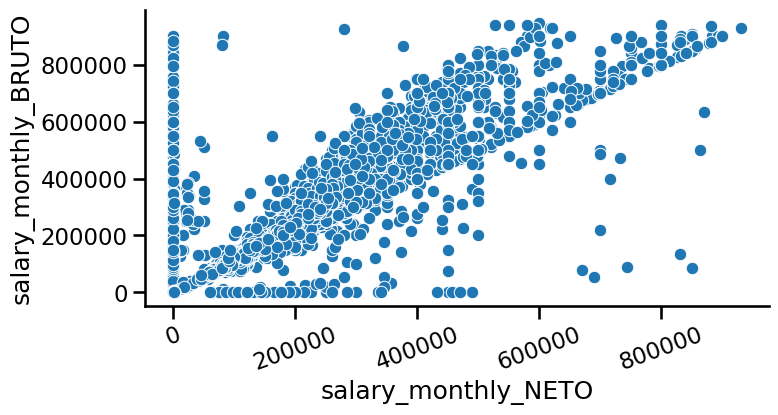

In [ ]:
import numpy as np
df_limpio=df[(df.salary_monthly_BRUTO <950000)& (df.salary_monthly_NETO <950000)]
seaborn.pairplot(data=df_limpio, y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=2, height=4)
plt.xticks(rotation=20)


2. Generamos una nueva columna `'salary_monthly_DESCUENTOS'= 'salary_monthly_BRUTO'-'salary_monthly_NETO'`, es decir que contenga los descuentos mensuales. 
3. Analice la distribución de esta columna de datos gráficamente.

In [ ]:
df_limpio['salary_monthly_DESCUENTOS']=df_limpio.salary_monthly_BRUTO-df_limpio.salary_monthly_NETO #generamos una nueva columna
#print(df_limpio.loc[0:2,'salary_monthly_BRUTO']), print(df_limpio.loc[0:2,'salary_monthly_NETO'])
#print(df_limpio['salary_monthly_DESCUENTOS'][0:2]) 
df_limpio[0:3] #mire la última columna 

<ipython-input-35-e4e2909bc463>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['salary_monthly_DESCUENTOS']=df_limpio.salary_monthly_BRUTO-df_limpio.salary_monthly_NETO #generamos una nueva columna


,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,numero,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,...,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender,profile_g,salary_monthly_DESCUENTOS
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),300000.0,245000.0,True,NaN,NaN,NaN,...,UP - Universidad de Palermo,NaN,NaN,NaN,NaN,NaN,35,Varón Cis,Varón cis,55000.0
1,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),900000.0,850000.0,True,Cobro todo el salario en dólares,300,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,31,Varón Cis,Varón cis,50000.0
2,Argentina,Chaco,Full-Time,Staff (planta permanente),120000.0,115000.0,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27,Varón Cis,Varón cis,5000.0


In [ ]:
df_limpio['salary_monthly_DESCUENTOS'].mean()

Interpretemos correlación entre las columnas de sueldos 

-Calcular las medias (ambas columnas)

-Hacer el grafico que corresponda

In [ ]:
matcov=np.cov(df_limpio.salary_monthly_BRUTO,df_limpio.salary_monthly_NETO)
print('matriz de varianza covarianza:','\n',matcov,'\n')

corr=np.corrcoef(df_limpio.salary_monthly_BRUTO,df_limpio.salary_monthly_NETO)
print('matriz de correlaciones: \n ', corr,'\n')

print('correlación entra ambas variables: ',corr[0,1],'\n')

#df_limpio.salary_monthly_BRUTO.describe().apply(lambda s: '{0:.2f}'.format(s))
#df_limpio.salary_monthly_NETO.describe().apply(lambda s: '{0:.2f}'.format(s))

matriz de varianza covarianza: 
 [[3.68466135e+10 2.35193860e+10]
 [2.35193860e+10 2.30150009e+10]] 

matriz de correlaciones: 
  [[1.        0.8076472]
 [0.8076472 1.       ]] 

correlación entra ambas variables:  0.8076472028686098 

